# Time Series Analysis on California Air Quality Index

## Overview

In this project, I attempted to find out if there was any significant change in the four air quality index(AQI) categories in California from the five seasons before the 2020 COVID pandemic when compared to the trend of the AQIs in the 2020 lockdown. The major difference that could have affected the trend in the lockdown was the absence of major contributors of pollution to the air. After our analysis, we were able to reject the null hypothesis and therefore concluded that there was a significant change in the trend of the AQIs before and during the lockdown.

## Research Question

How did the 2020 lockdown affect the trend of the AQIs in the 2020 calendar year compared to that of the previous 5 years (2014-15 to 2018-19)?

## Hypothesis

I believe the 2020 lockdown positively impacted all of the four air quality index categories compared to that of the previous 5 years due to a lack of pollutants from the suspension of activities.

In [1]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

## Data Setup

In [2]:
data = pd.read_csv('pollution_2000_2021.csv')

In [3]:
data.shape

(608699, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [5]:
data.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [6]:
#Check for missing values
data.isnull().values.any()

False

In [7]:
data.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [8]:
data_df = data.drop(['Address'], axis = 1)
data_df.head()

,Date,Year,Month,Day,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,Arizona,Maricopa,Phoenix,0.019765,0.040,10,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,Arizona,Maricopa,Phoenix,0.015882,0.032,10,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,Arizona,Maricopa,Phoenix,0.009353,0.016,9,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,Arizona,Maricopa,Phoenix,0.015882,0.033,9,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,Arizona,Maricopa,Phoenix,0.007353,0.012,9,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [9]:
# Setup all four AQIs for state and date
data_df = data_df[['Date', 'State', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']]
data_df['Date'] = pd.to_datetime(data_df['Date'], format = '%Y-%m-%d')
data_df

,Date,State,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,2000-01-01,Arizona,37,25.0,13.0,46
1,2000-01-02,Arizona,30,26.0,4.0,34
2,2000-01-03,Arizona,15,28.0,16.0,48
3,2000-01-04,Arizona,31,34.0,23.0,72
4,2000-01-05,Arizona,11,42.0,21.0,58
...,...,...,...,...,...,...
608694,2021-06-26,Wyoming,45,1.0,0.0,2
608695,2021-06-27,Wyoming,39,1.0,0.0,2
608696,2021-06-28,Wyoming,46,1.0,0.0,5
608697,2021-06-29,Wyoming,61,1.0,0.0,7


## Cleaning Outliers

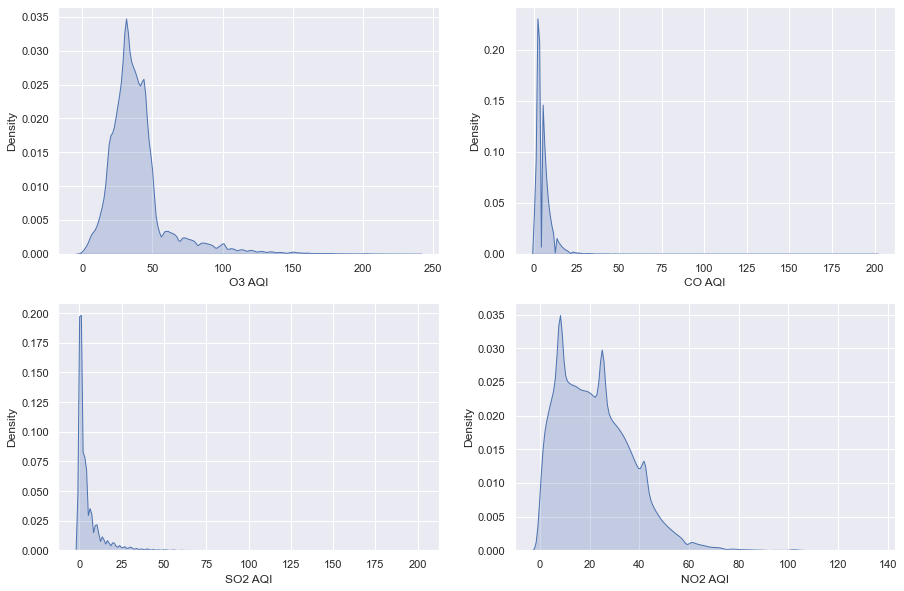

In [10]:
sns.set(rc={"figure.figsize": (15, 10)})

plt.subplot(2,2,1)
ax = sns.kdeplot(data_df['O3 AQI'],shade=True)

plt.subplot(2,2,2)
ax = sns.kdeplot(data_df['CO AQI'], shade=True)

plt.subplot(2,2,3)
ax = sns.kdeplot(data_df['SO2 AQI'], shade=True)

plt.subplot(2,2,4)
ax = sns.kdeplot(data_df['NO2 AQI'], shade=True)

plt.show()

<AxesSubplot:xlabel='O3 AQI', ylabel='Density'>

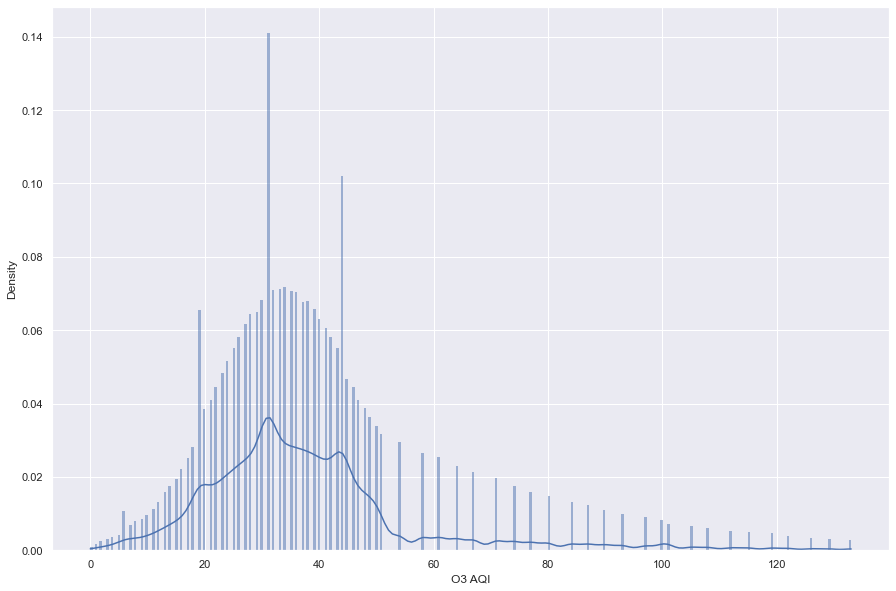

In [11]:
q1 = data_df['O3 AQI'].quantile(0.99)
O3_outliers = data_df[data_df['O3 AQI'] > q1]
data_df = data_df.drop(O3_outliers.index, axis= 0)
sns.histplot(data_df['O3 AQI'], kde=True, stat="density", linewidth=0)

Most observations fall into the range between 0 and 50 parts per million, while also showing that a plummet for values greater than 60. A few observations are present through 60 to 100 parts per million.

<AxesSubplot:xlabel='CO AQI', ylabel='Density'>

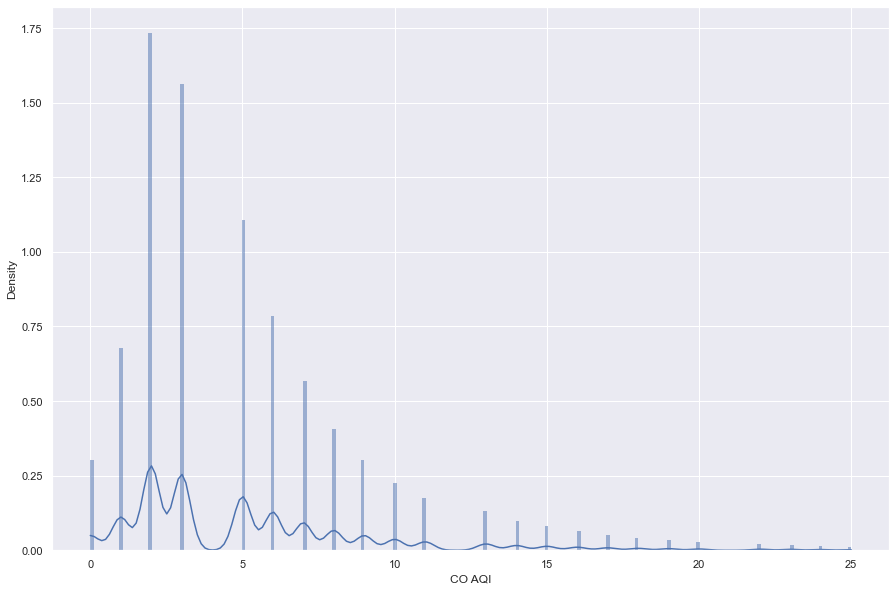

In [12]:
q2 = data_df['CO AQI'].quantile(0.99)
CO_outliers = data_df[data_df['CO AQI'] > q2]
data_df = data_df.drop(CO_outliers.index, axis= 0)
sns.histplot(data_df['CO AQI'], kde=True, stat="density", linewidth=0)

Most observations fall into the range between 0 and 10 parts per million.

<AxesSubplot:xlabel='SO2 AQI', ylabel='Density'>

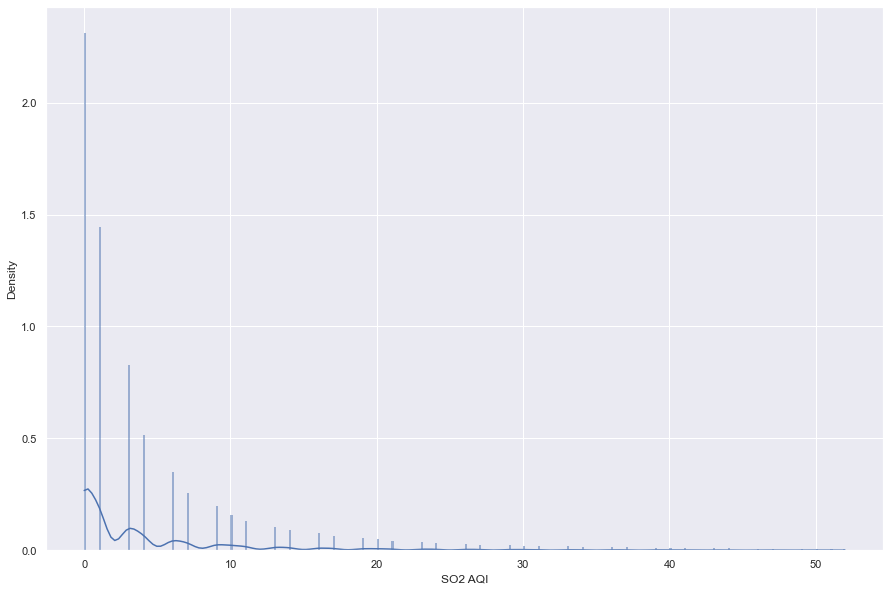

In [13]:
q3 = data_df['SO2 AQI'].quantile(0.99)
SO2_outliers = data_df[data_df['SO2 AQI'] > q3]
data_df = data_df.drop(SO2_outliers.index, axis= 0)
sns.histplot(data_df['SO2 AQI'], kde=True, stat="density", linewidth=0)

Most observations fall into the range between 0 and 10 parts per billion.

<AxesSubplot:xlabel='NO2 AQI', ylabel='Density'>

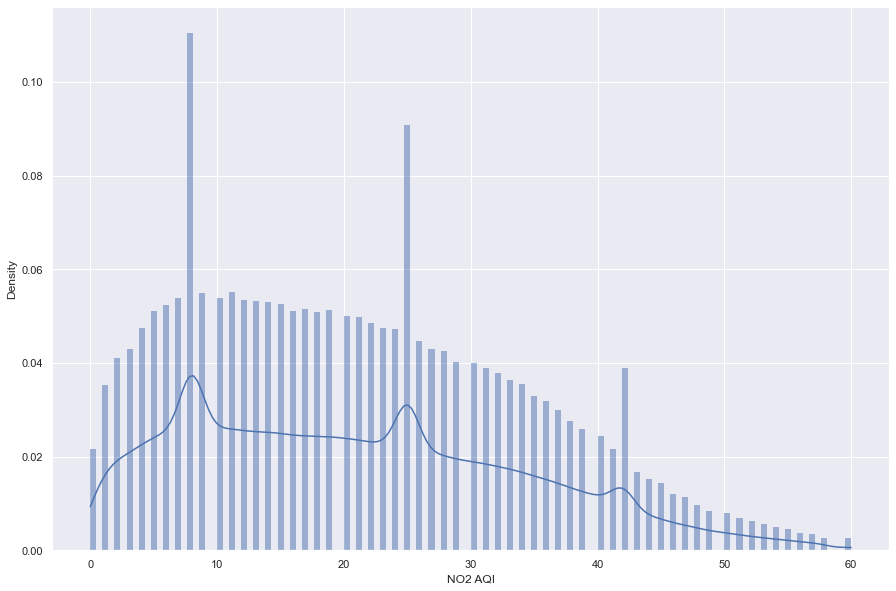

In [14]:
q4 = data_df['NO2 AQI'].quantile(0.99)
NO2_outliers = data_df[data_df['NO2 AQI'] > q4]
data_df = data_df.drop(NO2_outliers.index, axis= 0)
sns.histplot(data_df['NO2 AQI'], kde=True, stat="density", linewidth=0)

The data distribution nearly follows a normal distribution bell curve, except being slightly right-skewed.

### California AQI Development 

In [15]:
pollution_cali = data_df[data_df['State'] == 'California'].reset_index(drop = True)
pollution_cali.head()

,Date,State,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,2000-01-01,California,27,9.0,3.0,25
1,2000-01-02,California,30,9.0,3.0,28
2,2000-01-03,California,13,22.0,6.0,38
3,2000-01-04,California,10,23.0,6.0,42
4,2000-01-05,California,20,19.0,6.0,36


In [16]:
pollution_cali.shape

(177755, 6)

In [17]:
data_cali = pollution_cali.groupby(['State', 'Date']).mean()
data_cali = data_cali.reset_index(level = [0,1])
data_cali

,State,Date,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,California,2000-01-01,28.368421,9.526316,4.736842,22.105263
1,California,2000-01-02,31.750000,8.750000,3.900000,24.300000
2,California,2000-01-03,21.428571,12.785714,5.928571,30.428571
3,California,2000-01-04,19.857143,12.785714,6.285714,30.285714
4,California,2000-01-05,28.166667,8.583333,3.000000,23.416667
...,...,...,...,...,...,...
7939,California,2021-09-26,34.666667,2.833333,1.166667,3.166667
7940,California,2021-09-27,31.166667,3.000000,0.333333,6.333333
7941,California,2021-09-28,32.833333,2.666667,0.333333,11.000000
7942,California,2021-09-29,27.833333,3.666667,0.833333,16.500000


In [18]:
# Monthly Data Average
monthly_cali_data = data_cali.groupby('State').resample('1M', label = 'right', closed = 'right', on = 'Date').mean().reset_index().sort_values(by = 'Date')
monthly_cali_data

,State,Date,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,California,2000-01-31,21.140639,11.139404,4.693538,26.514108
1,California,2000-02-29,29.628745,9.610631,4.036020,26.628716
2,California,2000-03-31,38.215054,8.507330,5.552824,27.515604
3,California,2000-04-30,42.865589,7.278763,5.040291,24.500783
4,California,2000-05-31,44.698609,6.325022,6.190323,22.683768
...,...,...,...,...,...,...
256,California,2021-05-31,45.725497,2.694417,0.396845,11.362520
257,California,2021-06-30,42.817300,2.882680,0.427776,12.428322
258,California,2021-07-31,27.612903,2.143433,0.623848,4.930876
259,California,2021-08-31,35.643011,4.186022,0.699462,7.266667


## Data Visualization

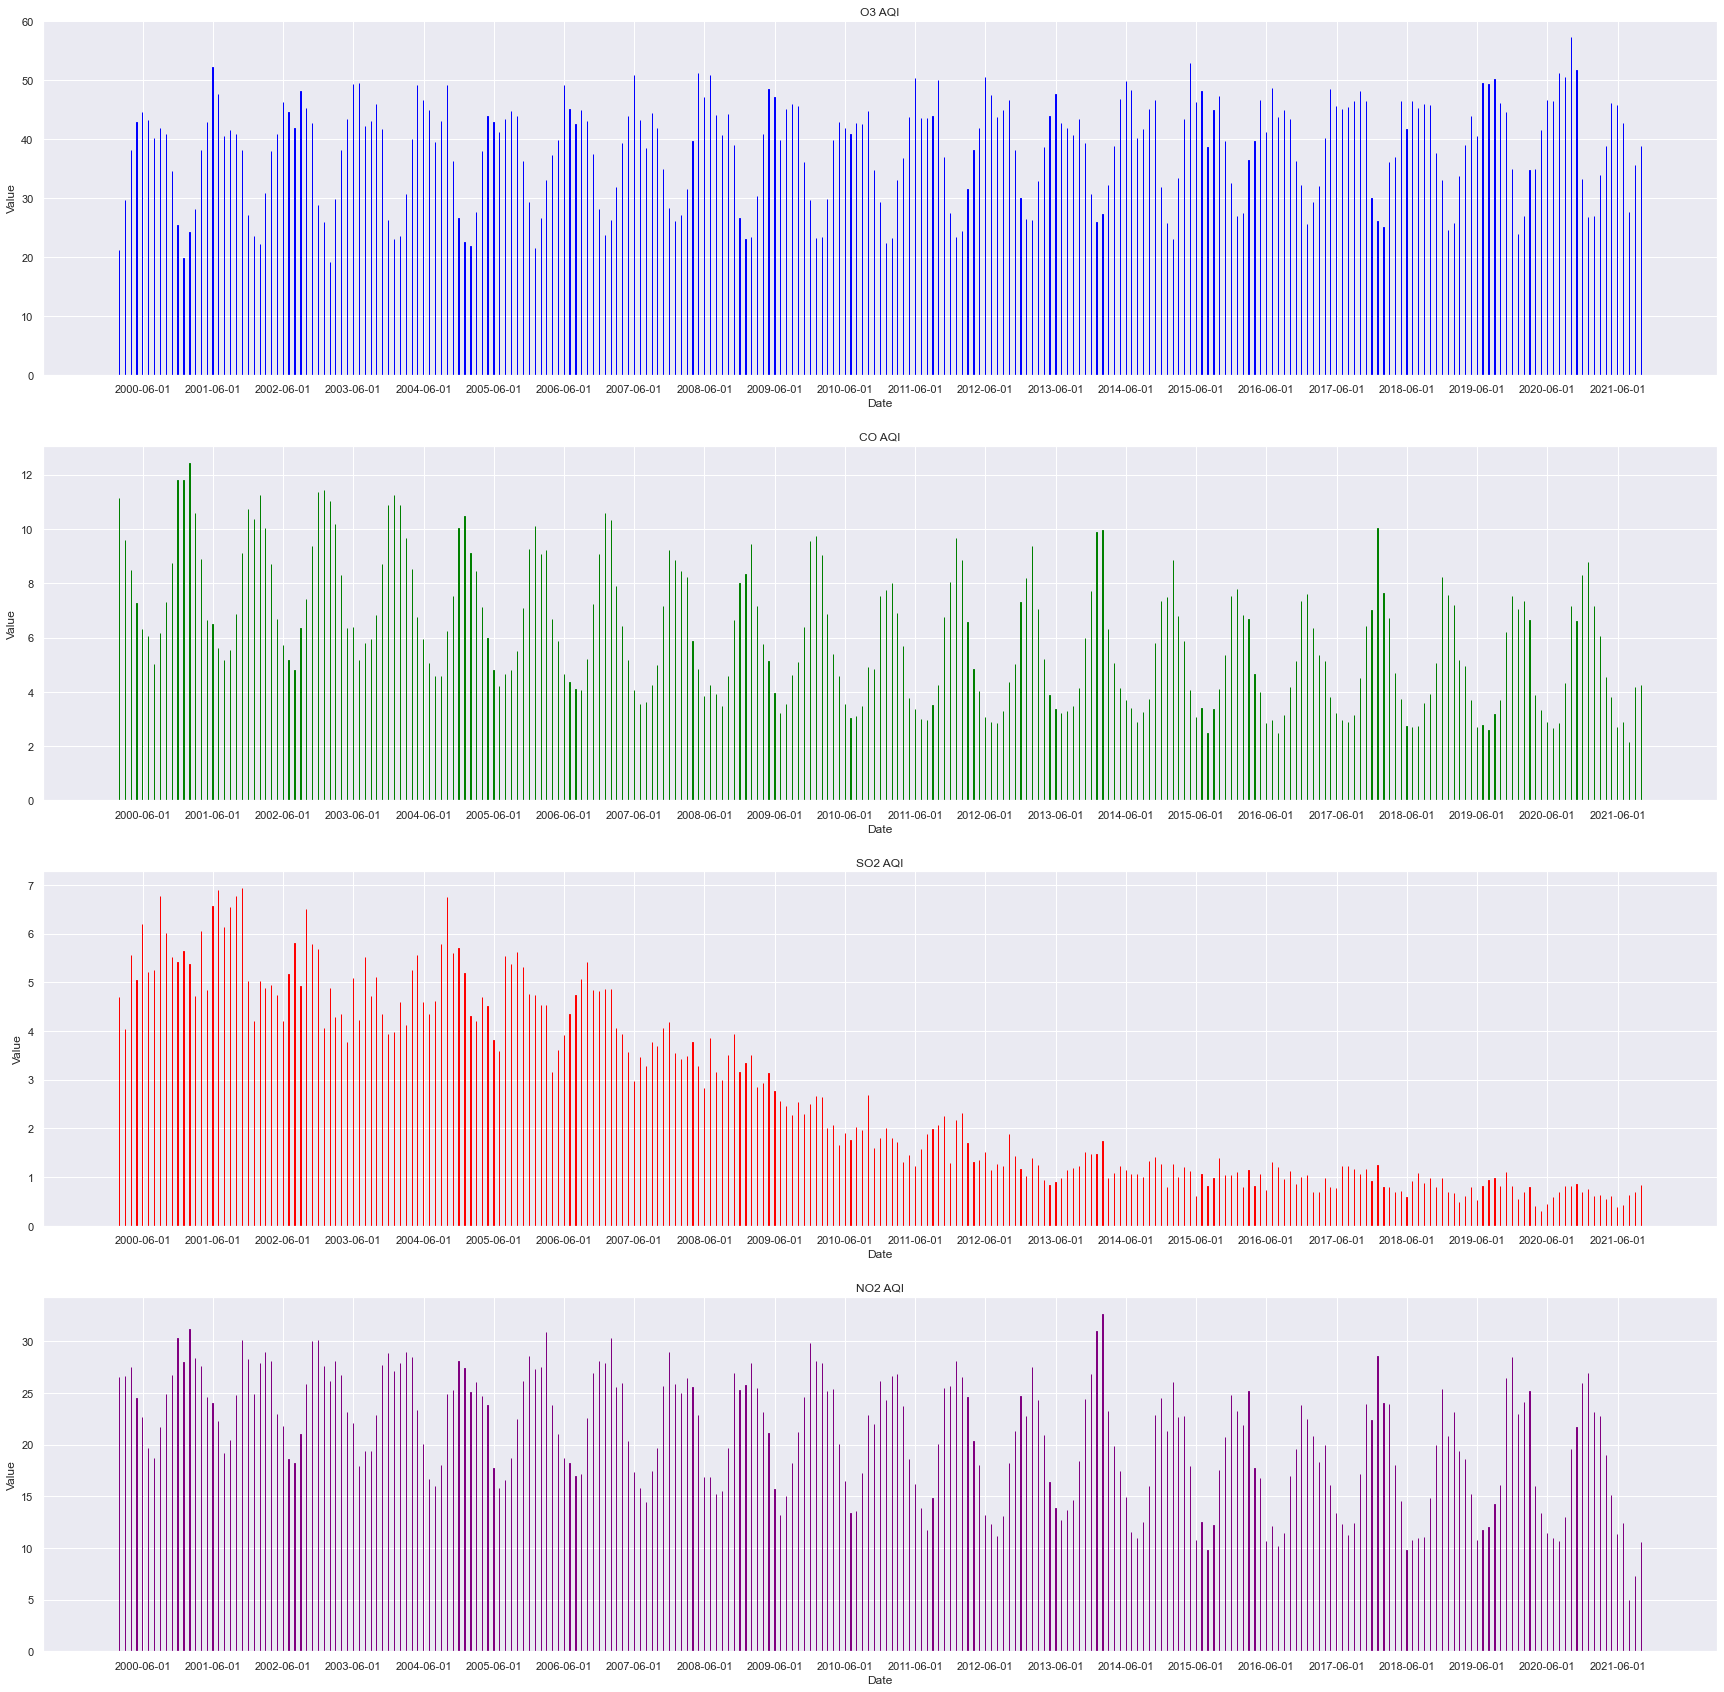

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (30, 30)) 
for ax in ax1, ax2, ax3, ax4:
    ax.set(xlabel = 'Date')
    ax.set(ylabel = 'Value')
    
ax1.bar(monthly_cali_data['Date'], monthly_cali_data['O3 AQI'], edgecolor = 'blue')
ax1.set_title('O3 AQI')
ax1.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06','2011-06','2012-06','2013-06','2014-06','2015-06','2016-06','2017-06','2018-06','2019-06','2020-06','2021-06']) 

ax2.bar(monthly_cali_data['Date'], monthly_cali_data['CO AQI'], edgecolor = 'green')
ax2.set_title('CO AQI')
ax2.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06','2011-06','2012-06','2013-06','2014-06','2015-06','2016-06','2017-06','2018-06','2019-06','2020-06','2021-06']) 

ax3.bar(monthly_cali_data['Date'], monthly_cali_data['SO2 AQI'], edgecolor = 'red')
ax3.set_title('SO2 AQI')
ax3.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06','2011-06','2012-06','2013-06','2014-06','2015-06','2016-06','2017-06','2018-06','2019-06','2020-06','2021-06']) 

ax4.bar(monthly_cali_data['Date'], monthly_cali_data['NO2 AQI'], edgecolor = 'purple')
ax4.set_title('NO2 AQI')
ax4.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06','2011-06','2012-06','2013-06','2014-06','2015-06','2016-06','2017-06','2018-06','2019-06','2020-06','2021-06'])
plt.show()

While we observe reoccuring seasonal patterns for all of the four air quality index categories for California, CO, SO2, and NO2 values are not as spread as they are for O3 and the overall measured values tend to have declined over the last years. Generally, pollutions are the highest during summer and lowest during winter. Noteworthy is the sudden peak of NO2 recordsin 2013. The previous years has shown a declining trend.

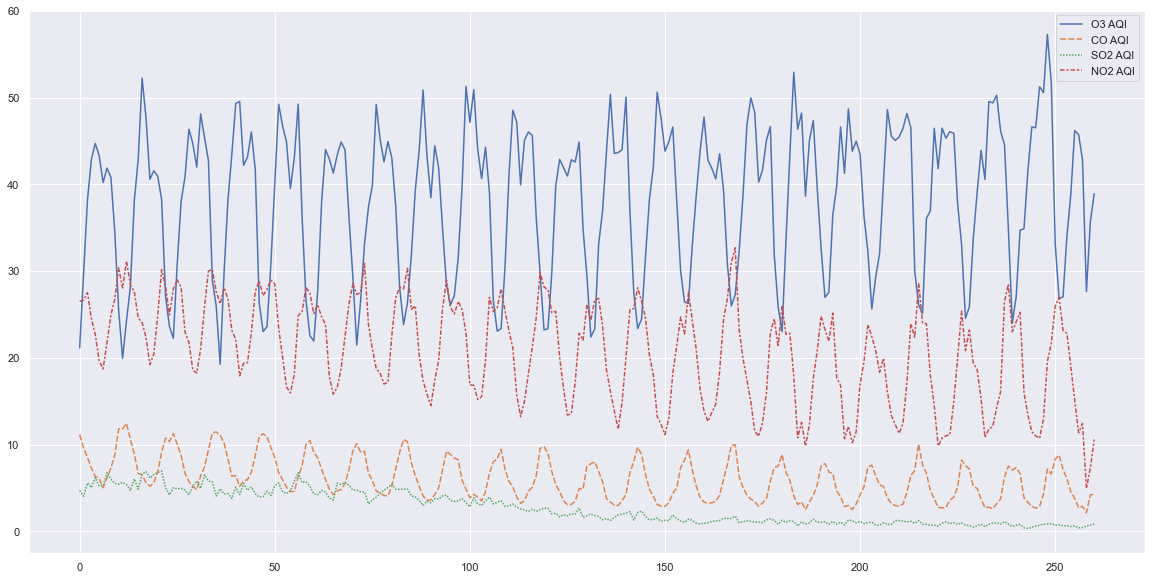

In [20]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = monthly_cali_data)
plt.show()

The chart represent the relatively wide-spread records of NO2 and O3. The graph shows that their monthly means lie between 10-30 parts per billion and 20-50 parts per million, respectively.

In [21]:
monthly_cali_data.corr()

,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
O3 AQI,1.000000,-0.770164,-0.082113,-0.632689
CO AQI,-0.770164,1.000000,0.467196,0.917090
SO2 AQI,-0.082113,0.467196,1.000000,0.481130
NO2 AQI,-0.632689,0.917090,0.481130,1.000000


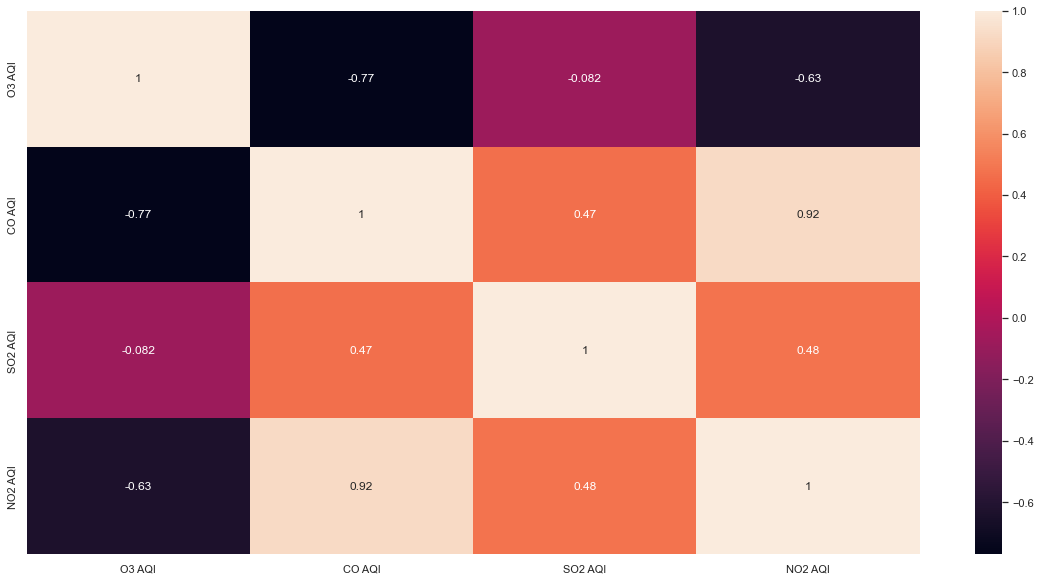

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(monthly_cali_data.corr(), annot = True)
plt.show()

I'm using heatmap as it helps display a graphical representation of the data with the correlation between each of the greenhouse gases. From the graph, I can see that there is a very strong positive relationship between the gases CO and NO2. There is also a moderate relationship between the gases CO and SO2, and NO2 and SO2.

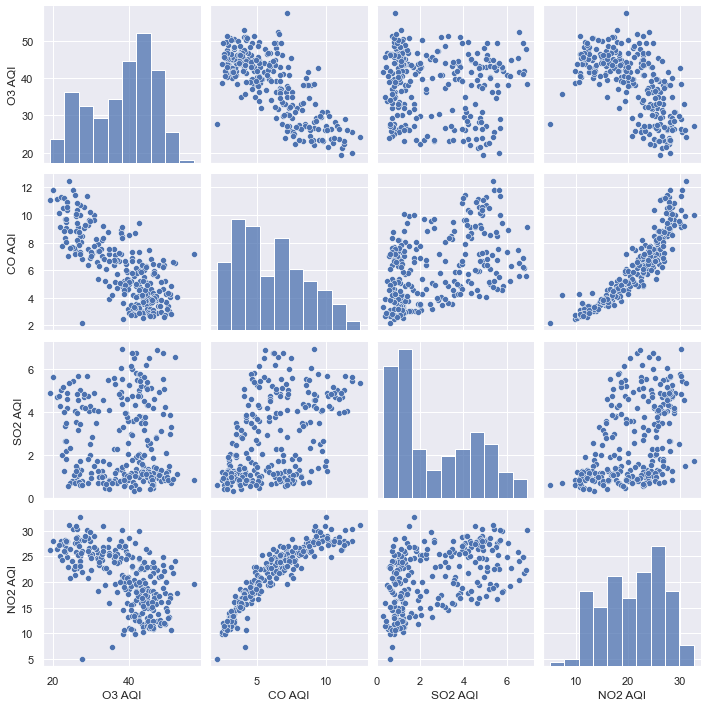

In [23]:
sns.pairplot(monthly_cali_data)
plt.show()

Linear relationships can only be (to some extent) observed between NO2 and CO, NO2 and SO2, and CO and SO2.

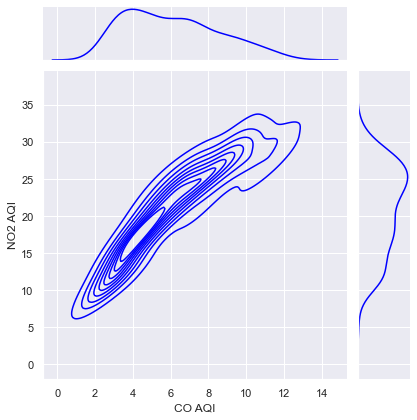

In [24]:
sns.jointplot(x = 'CO AQI', y = 'NO2 AQI', data = monthly_cali_data, kind = 'kde', color = 'blue')
plt.show()

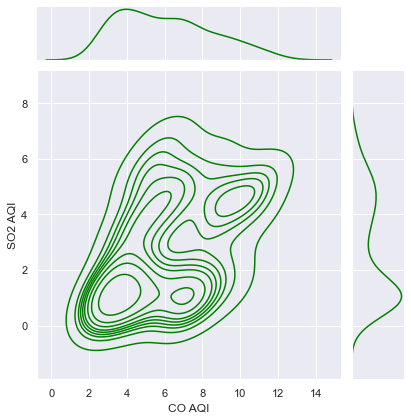

In [25]:
sns.jointplot(x = 'CO AQI', y = 'SO2 AQI', data = monthly_cali_data, kind = 'kde', color = 'green')
plt.show()

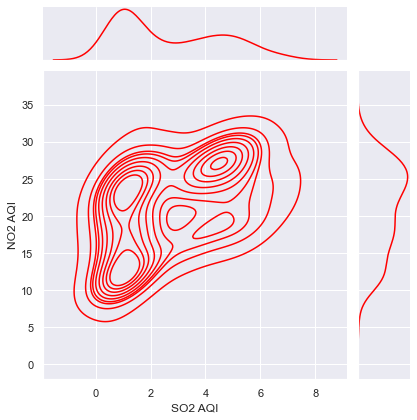

In [26]:
sns.jointplot(x = 'SO2 AQI', y = 'NO2 AQI', data = monthly_cali_data, kind = 'kde', color = 'red')
plt.show()

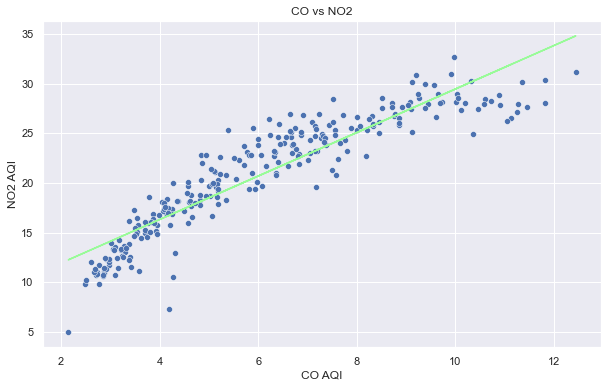

The slope of the linear regression is [2.19110285]


In [27]:
fig, ax = plt.subplots(figsize=(10,6))
regr = LinearRegression()
x = np.array(monthly_cali_data['CO AQI']).reshape(-1,1)
y = np.array(monthly_cali_data['NO2 AQI']).reshape(-1,1)
fitting = regr.fit(x, y)
slope = fitting.coef_[0]
sns.scatterplot(data = monthly_cali_data, x = 'CO AQI', y = 'NO2 AQI').set(title = 'CO vs NO2')
plt.plot(x, fitting.predict(x), color = 'palegreen')
plt.show()
print("The slope of the linear regression is {}".format(slope))

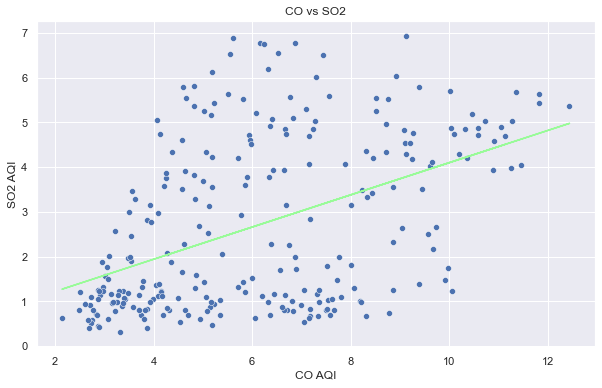

The slope of the linear regression is [0.35963553]


In [28]:
fig, ax = plt.subplots(figsize=(10,6))
regr = LinearRegression()
x = np.array(monthly_cali_data['CO AQI']).reshape(-1,1)
y = np.array(monthly_cali_data['SO2 AQI']).reshape(-1,1)
fitting = regr.fit(x, y)
slope = fitting.coef_[0]
sns.scatterplot(data = monthly_cali_data, x = 'CO AQI', y = 'SO2 AQI').set(title = 'CO vs SO2')
plt.plot(x, fitting.predict(x), color = 'palegreen')
plt.show()
print("The slope of the linear regression is {}".format(slope))

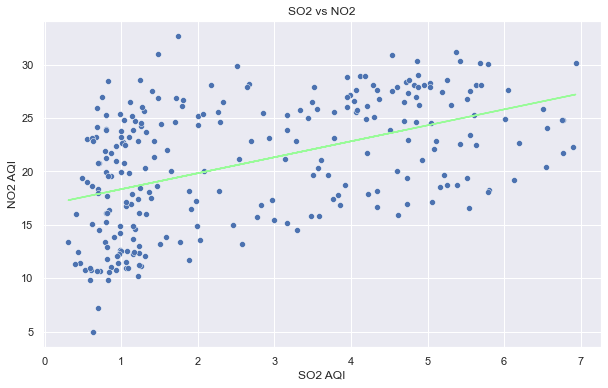

The slope of the linear regression is [1.4933104]


In [29]:
fig, ax = plt.subplots(figsize=(10,6))
regr = LinearRegression()
x = np.array(monthly_cali_data['SO2 AQI']).reshape(-1,1)
y = np.array(monthly_cali_data['NO2 AQI']).reshape(-1,1)
fitting = regr.fit(x, y)
slope = fitting.coef_[0]
sns.scatterplot(data = monthly_cali_data, x = 'SO2 AQI', y = 'NO2 AQI').set(title = 'SO2 vs NO2')
plt.plot(x, fitting.predict(x), color = 'palegreen')
plt.show()
print("The slope of the linear regression is {}".format(slope))

### Time Series Decomposition

Decomposing our time series into three distinct components for the development of California's AQI over time
- Trend
- Seasonality
- Noise

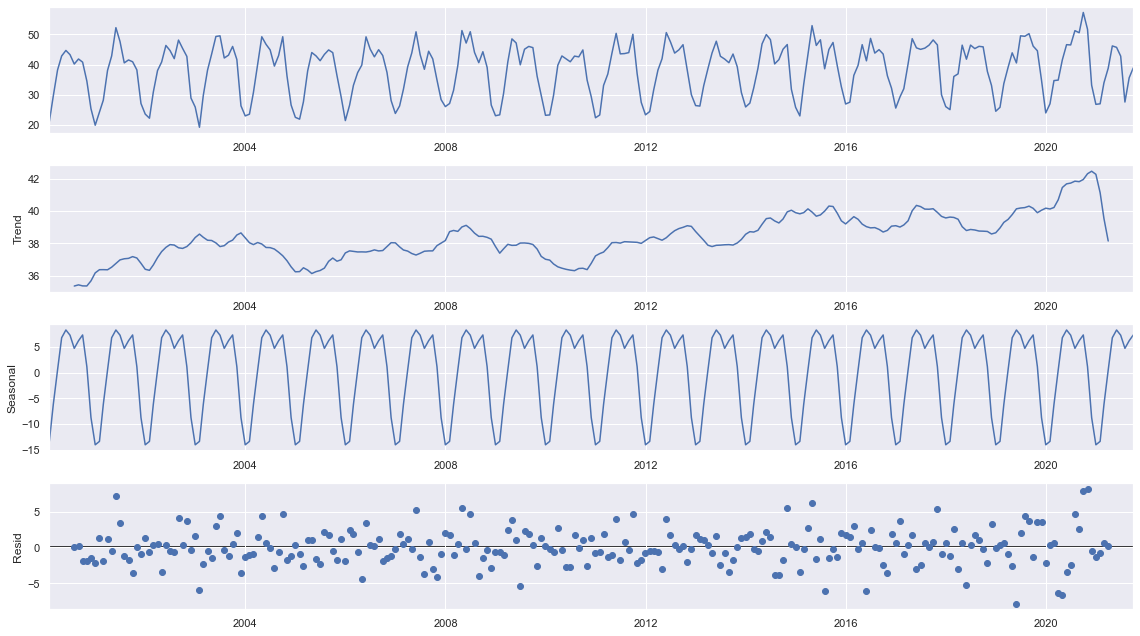

In [30]:
date_O3 = monthly_cali_data[['Date', 'O3 AQI']]
date_O3.set_index('Date', inplace = True)
decomposition = sm.tsa.seasonal_decompose(date_O3, model = 'additive')
fig = decomposition.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

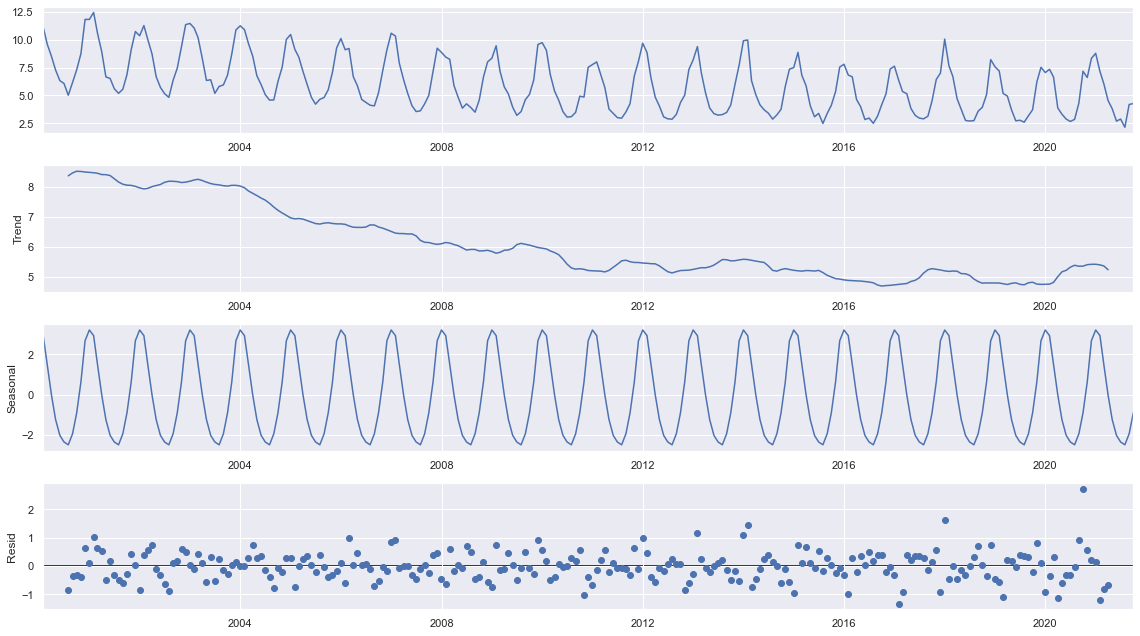

In [31]:
date_CO = monthly_cali_data[['Date', 'CO AQI']]
date_CO.set_index('Date', inplace = True)
decomposition = sm.tsa.seasonal_decompose(date_CO, model = 'additive')
fig = decomposition.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

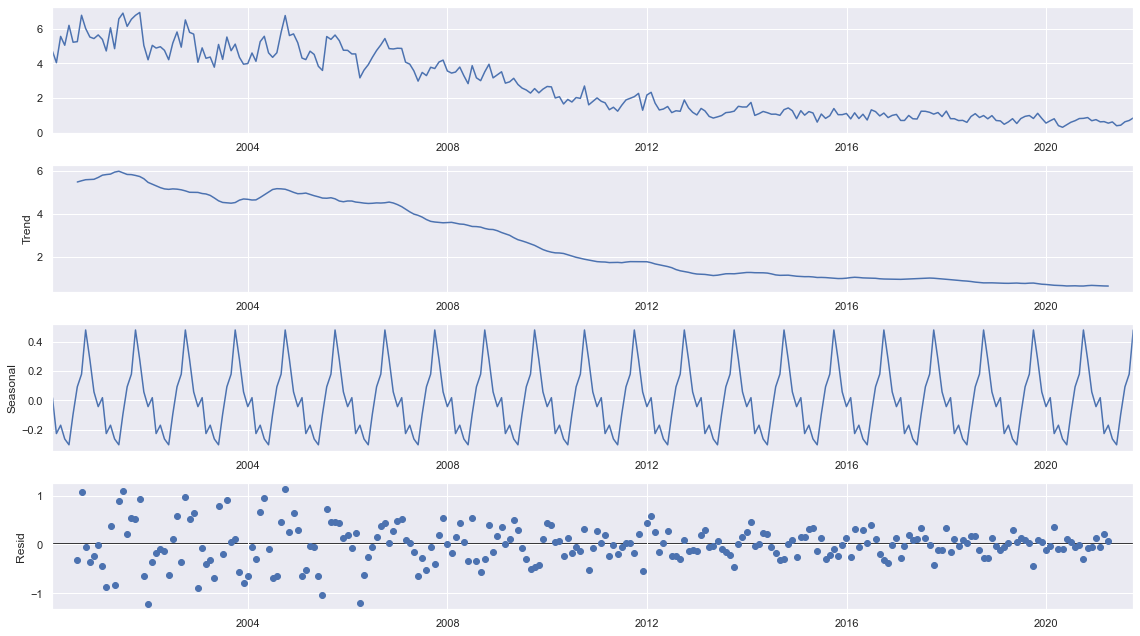

In [32]:
date_SO2 = monthly_cali_data[['Date', 'SO2 AQI']]
date_SO2.set_index('Date', inplace = True)
decomposition = sm.tsa.seasonal_decompose(date_SO2, model = 'additive')
fig = decomposition.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

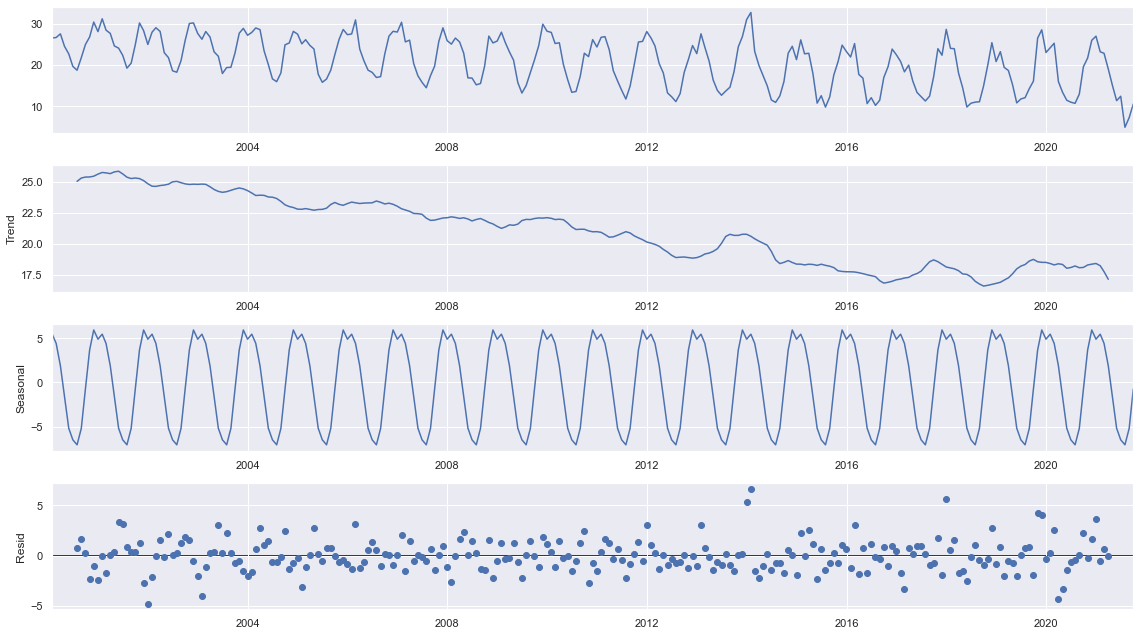

In [33]:
date_NO2 = monthly_cali_data[['Date', 'NO2 AQI']]
date_NO2.set_index('Date', inplace = True)
decomposition = sm.tsa.seasonal_decompose(date_NO2, model = 'additive')
fig = decomposition.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

## Data Analysis & Results

The tests that we chose to use on the data to determine whether the lockdown affected the four AQIs were 2 sample t-test for O3, CO, SO2, and NO2. This is because we are using two independent distributions of original and predicted data that are normally distributed. 

In [34]:
pre_covid_data = monthly_cali_data[(monthly_cali_data['Date'] >= '2014-6-30') & (monthly_cali_data['Date'] <= '2019-6-30')].reset_index()
during_covid_data = monthly_cali_data[(monthly_cali_data['Date'] >= '2020-6-30') & (monthly_cali_data['Date'] <= '2021-6-30')].reset_index()

In [35]:
pre_covid_O3 = pre_covid_data['O3 AQI']
during_covid_O3 = during_covid_data['O3 AQI']
stats.ttest_ind(pre_covid_O3, during_covid_O3, equal_var=False)

Ttest_indResult(statistic=-1.0443944610279088, pvalue=0.31224946003197523)

The 2 sample t-test for O3 AQI has a p-value of 0.312 which is greater than alpha=0.05 so we fail to reject our null hypothesis that there is no difference between pre-covid O3 AQI values and during covid O3 AQI values. There is insufficient statistically significant evicence to suggest that the lockdown positively impacted O3 AQI values.

In [36]:
pre_covid_CO = pre_covid_data['CO AQI']
during_covid_CO = during_covid_data['CO AQI']
stats.ttest_ind(pre_covid_CO, during_covid_CO, equal_var=False)

Ttest_indResult(statistic=-0.41584932418786, pvalue=0.6830022141366637)

The 2 sample t-test for CO AQI has a p-value of 0.683 which is greater than alpha=0.05 so we fail to reject our null hypothesis that there is no difference between pre-covid CO AQI values and during covid CO AQI values. There is insufficient statistically significant evicence to suggest that the lockdown positively impacted CO AQI values.

In [37]:
pre_covid_SO2 = pre_covid_data['SO2 AQI']
during_covid_SO2 = during_covid_data['SO2 AQI']
stats.ttest_ind(pre_covid_SO2, during_covid_SO2, equal_var=False)

Ttest_indResult(statistic=6.282379976117136, pvalue=1.0790223375745602e-06)

The 2 sample t-test for CO AQI has a p-value of 1.0790223375745602e-06 which is smaller than alpha=0.05 so we reject our null hypothesis that there is no difference between pre-covid SO2 AQI values and during covid SO2 AQI values. Noteworthy is the declining trend of SO2 pre-covid all the way into the lockdown which further decline. There is somewhat sufficient statistically significant evicence to suggest that the lockdown positively impacted SO2 AQI values. 

In [38]:
pre_covid_NO2 = pre_covid_data['NO2 AQI']
during_covid_NO2 = during_covid_data['NO2 AQI']
stats.ttest_ind(pre_covid_NO2, during_covid_NO2, equal_var=False)

Ttest_indResult(statistic=-0.2052934472039425, pvalue=0.8398735996359583)

The 2 sample t-test for CO AQI has a p-value of 0.839 which is greater than alpha=0.05 so we fail to reject our null hypothesis that there is no difference between pre-covid NO2 AQI values and during covid NO2 AQI values. There is insufficient statistically significant evicence to suggest that the lockdown positively impacted NO2 AQI values.

## Conclusion

After conducting analyses on the AQIs, we found that there were some deviations with their trends pre-covid and during covid. However, none of these were significant enough based on the hypothesis tests we conducted. It is reasonable to say that there was no marked difference in the trend of the AQIs and that any deviations could be attributed to random chance and not necessarily due to the lockdown.